# MULTIPLE LINEAR REGRESSION

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline 

In [2]:
insurance = pd.read_csv('/Users/parrthhkharkar/Desktop/ML resources/ML Algos/Multi Linear Regression/Dataset/insurance.csv')

In [5]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [6]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### Here, if you sex, region and smoker are categorical values

#### They are string values and we need to convert them to numeric values

In [9]:
# We have to initially, convert it to astype category 
insurance['sex'] = insurance['sex'].astype('category')
insurance['sex'] = insurance['sex'].cat.codes

insurance['region'] = insurance['region'].astype('category')
insurance['region'] = insurance['region'].cat.codes

insurance['smoker'] = insurance['smoker'].astype('category')
insurance['smoker'] = insurance['smoker'].cat.codes
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


#### To check if any of the columns contain null values

In [10]:
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### The task we are going to perform here today is that using all these variables we are going to predict chargers. So these, variables are the training features and charges would be our labels.

#### In Multiple linear regression we have several parameters so instead of having one parameter in the simple linear regression ( i.e. X) we will be having multiple X's

In [12]:
# DEFIINING OUR TRAINING FEATURES

X = insurance.drop(columns = 'charges')
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [14]:
y = insurance['charges']

#### Splitting the data, so that we can keep the portion of the dataset for the training and portion of the dataset for the testing 

#### So we are going to use train test split method from the scikit-learn library 

In [15]:
from sklearn.model_selection import train_test_split

# Here, test_size = 0.3 means 30% of the data is kept for testing and remaining 70% for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [27]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [28]:
lr.fit(X_train, y_train)

LinearRegression()

In [29]:
c = lr.intercept_
c

-11827.7331417957

In [30]:
m = lr.coef_
m

array([  256.5772619 ,   -49.39232379,   329.02381564,   479.08499828,
       23400.28378787,  -276.31576201])

#### We have 6 coefficients for our 6 training features

#### Try to predict the charges using the training set 

In [32]:
y_pred_train = lr.predict(X_train)
y_pred_train

array([ 2074.0645306 ,  8141.81393908, 18738.94132528,  7874.86959064,
        6305.12726989,  2023.19725425, 26861.18663021, 14932.93021746,
       10489.56733846, 16254.02800921, 11726.39324257, 11284.0092172 ,
       39312.16870908,  5825.91078917, 12314.92042527,  3164.68427134,
       15406.30681252,  4648.58167988,  5011.79585436,  6012.4796038 ,
       15349.49652486,  8970.97358853,  8780.43012222, 34229.60622887,
        6700.80932636, 26943.25864121, 27280.48004482, 15477.83837581,
        8825.62578924, 34394.38378457, 10177.85528603,  3901.18161227,
       15608.58732963, 29584.76846515, 29453.37088923, 28132.67012427,
       10003.22154888, 33049.08935397,  3963.45204974, 25461.54857001,
        5656.76892592, 27993.86773531,  7049.4472544 , 15100.38851758,
        2552.92266861, 35458.5756605 , 15250.90732084,  3190.28483443,
        1768.85441295, 10155.17603664,  9937.89476088, 11225.91583863,
       16776.25691816,  4332.14442527,  1904.56473771,  4169.01766783,
      

#### Checking how good is the prediction

Text(0, 0.5, 'Predicted charges')

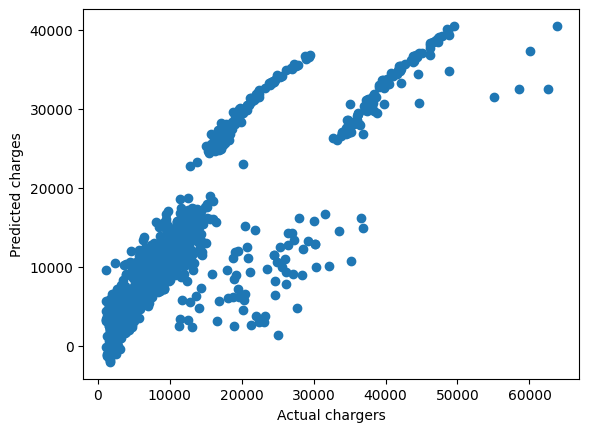

In [34]:
import matplotlib.pyplot as plt
plt.scatter(y_train, y_pred_train)
plt.xlabel('Actual chargers')
plt.ylabel('Predicted charges')

#### Using r2_score

In [35]:
from sklearn.metrics import r2_score
r2_score(y_train, y_pred_train)

0.7306840408360217

#### What r2_score does it shows how close the data have fitted to the regression line or the portion of the variance for a dependent variable that means the charges can be explained by the independent variables in the regression model and the independent variables are our training features

#### If the r2_score is closer to 1 then it is better

In [36]:
y_pred_test = lr.predict(X_test)

Text(0, 0.5, 'Predicted charges')

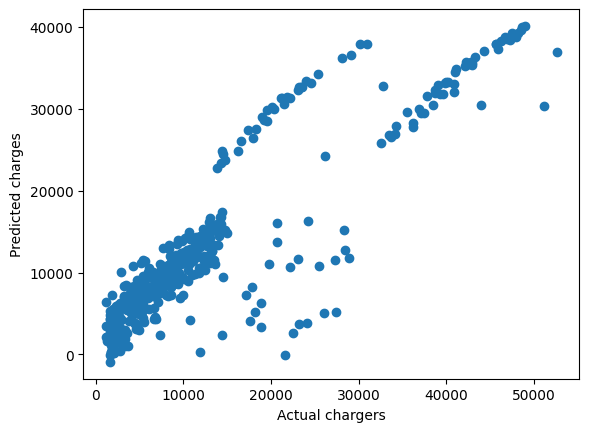

In [37]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred_test)
plt.xlabel('Actual chargers')
plt.ylabel('Predicted charges')

In [38]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_test)

0.7911113876316934